In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

# read data

In [4]:
words = open('../data/names.txt', 'r').read().splitlines()

In [5]:
len(words)

32033

In [6]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [7]:
chars = sorted(list(set(''.join(words))))

# util 

In [8]:
itos = {}
itos[0] = '.'
itos |= {i+1: s for i, s in enumerate(chars)}

In [9]:
stoi = {s: i for i, s in itos.items()}

# build N

In [10]:
len(itos)

27

In [11]:
N = torch.zeros(len(itos), len(itos))

In [12]:
for w in words[:]:
    w2 = '.' + w + '.'
    for ch1, ch2 in zip(w2, w2[1:]):
        if ch1 != '.' and ch1 != 'a':
            # continue
            pass
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [13]:
P = N / N.sum(1, keepdim=True)

In [92]:
P[0].sum(), P[:,0].sum()

(tensor(1.), tensor(3.0222))

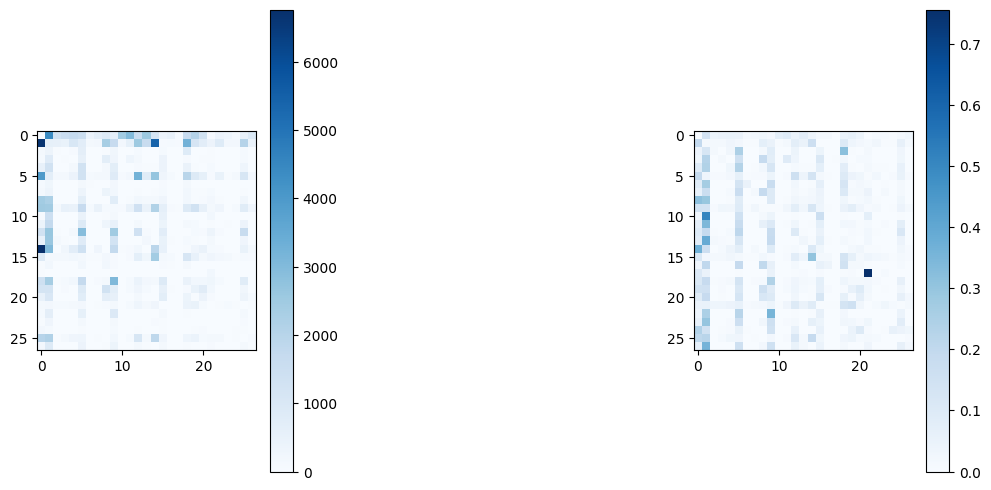

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(N, cmap='Blues')
plt.colorbar()
plt.subplot(133)
plt.imshow(P, cmap='Blues')
plt.colorbar()
plt.show()

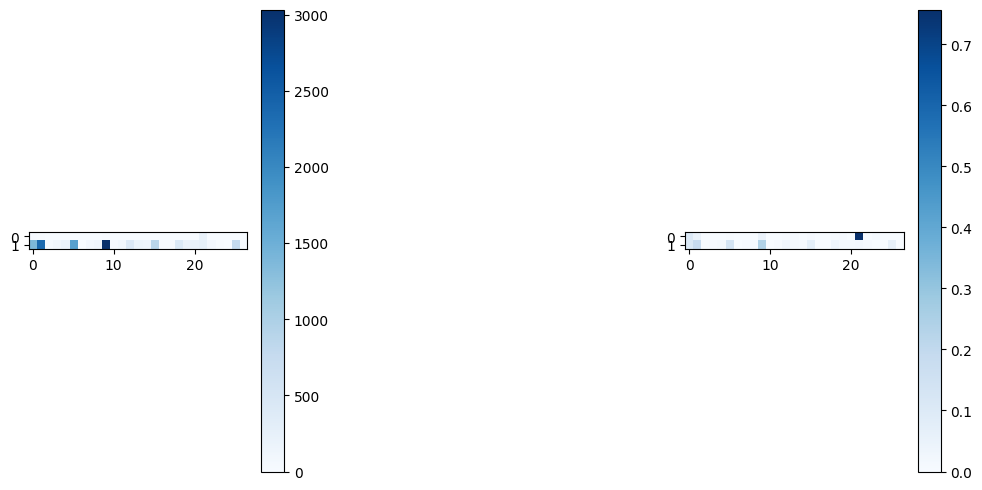

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(N[17:19], cmap='Blues')
plt.colorbar()
plt.subplot(133)
plt.imshow(P[17:19], cmap='Blues')
plt.colorbar()
plt.show()

In [24]:
itos[17]

'q'

# sample

In [34]:
for _ in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

ty.
mya.
yalyabrizayal.
celatzioligavicekyada.
jan.
zla.
lerede.
julodal.
leenaraa.
stiiaza.


# compute loss

In [40]:
nll = 0
n = 0
for w in words[:]:
    w2 = '.' + w + '.'
    for ch1, ch2 in zip(w2, w2[1:]):
        if ch1 != '.' and ch1 != 'a':
            # continue
            pass
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        nll += -P[ix1, ix2].log().item()
        n += 1
nll/n

2.454014497322693

# train a bigram nn

## prepare data

In [41]:
xs, ys = [], []
for w in words[:]:
    w2 = '.' + w + '.'
    for ch1, ch2 in zip(w2, w2[1:]):
        if ch1 != '.' and ch1 != 'a':
            # continue
            pass
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

In [42]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [43]:
xs, ys

(tensor([ 0,  5, 13,  ..., 25, 26, 24]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [44]:
xs.shape, ys.shape

(torch.Size([228146]), torch.Size([228146]))

## build a simple nn

In [45]:
losses = []
# w = torch.randn(len(itos), len(itos), requires_grad=True)
w = torch.zeros((len(itos), len(itos)), requires_grad=True)

for i in tqdm(range(500)):
    # forward
    xenc = F.one_hot(xs, num_classes=len(itos)).float()
    logits = xenc @ w
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(ys.shape[0]), ys].log().mean()
    losses.append(loss.item())

    # backword
    w.grad = None
    loss.backward()

    # update
    w.data += -10.0 * w.grad

100%|████████████████████████████████████████████████████████████████| 500/500 [00:33<00:00, 14.88it/s]


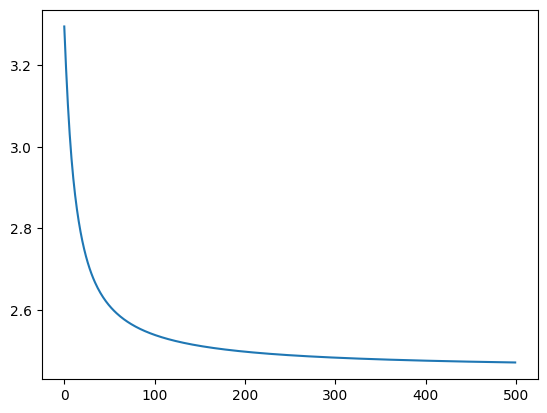

In [46]:
plt.plot(losses);

In [104]:
losses[-5:]

[2.470601797103882,
 2.4705655574798584,
 2.470529556274414,
 2.470494031906128,
 2.4704580307006836]

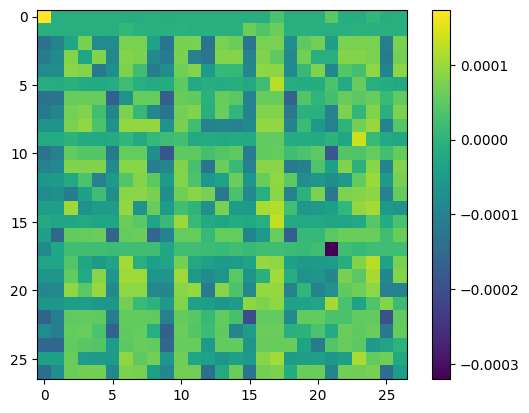

In [47]:
# plt.imshow(w.grad[0:2,])
plt.imshow(w.grad)
plt.colorbar()
plt.show()

In [ ]:
(torch.eye(len(itos)) @ w)

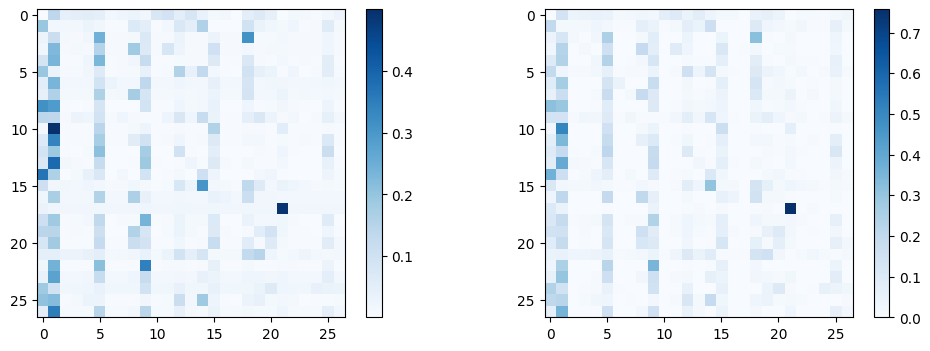

In [107]:
# plt.imshow(w.data[0:2])
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(F.softmax(torch.eye(len(itos)) @ w, dim=1).data, cmap='Blues')
plt.colorbar()
plt.subplot(122)
plt.imshow(P, cmap='Blues')
plt.colorbar()
plt.show()

In [114]:
itos[15]

'o'